# **Project 2**, APS1070 Summer 2021
**Anomaly Detection Algorithm using Gaussian Mixture Model **



In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=861c1569cbe3b3bef8dfd0ab8744d9b02bf124ac35a4196cb760090204eefa25
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
#print(df)
(df['Class'].value_counts()/df['Class'].count())*100

0    99.827251
1     0.172749
Name: Class, dtype: float64



To know whether the dataset is balanced and imbalanced is important because the imbalanced dataset tend to be more susceptible to wrong prediction. For example, in the case of this dataset, the fraud transaction datapoints are very less in comparision to the non-fraud transaction. As the algorithm is designed to maximize the overall accuracy, the accuracy might be increased but in reality the algorithm might be poor in prediction.
If the dataset is unbalanced, kNN classifier would not perform well because kNN classifies the object based on the number of "k" neighbours' classes. For example, if k=3 and majority of the class for the nearest neighbour is "0", the classifier would classify the object's as "0". This produces a bias in the classification.
 

In [ ]:
### Split the data  ###
X=df.iloc[:,0:30]
Y=df.iloc[:,30]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.105, random_state=0) 


In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

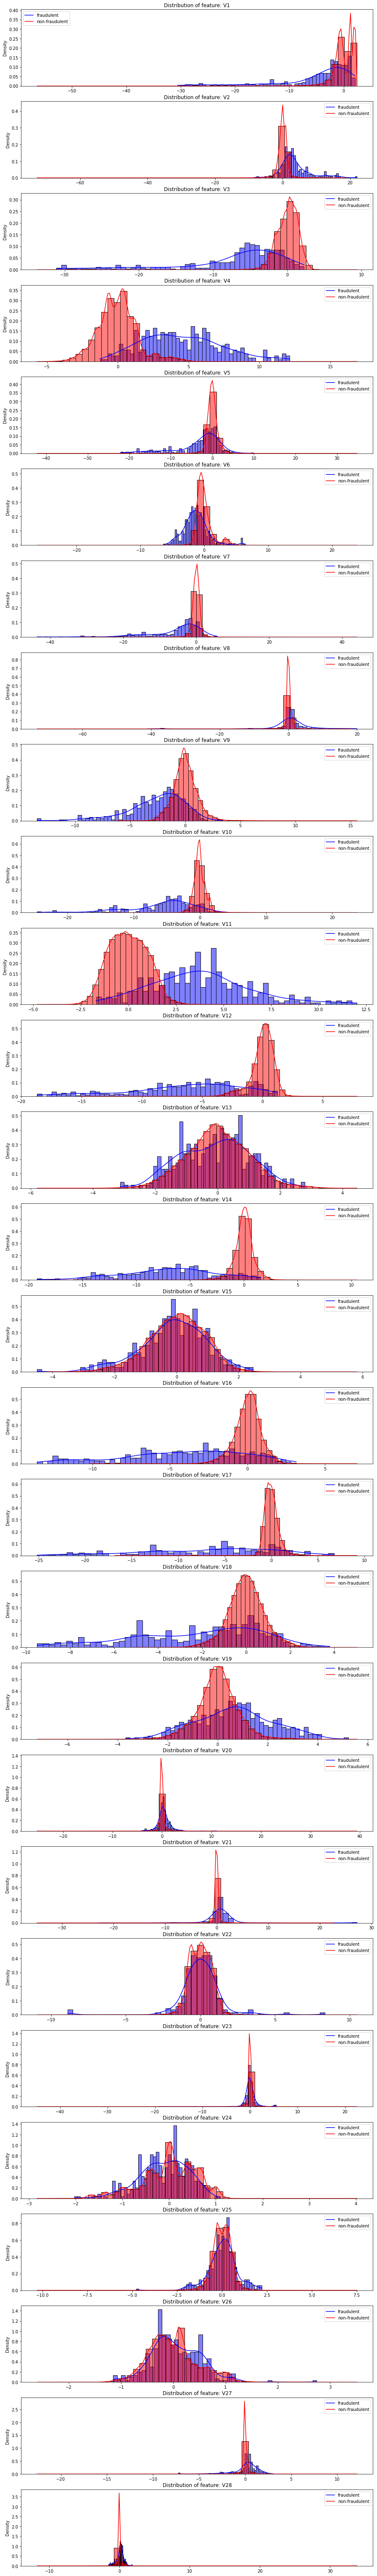

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

The graphs above is a form of continious distribution,precisely, Guassian distribution. The Guassian Distribution is parameterized by mean and variance. As the plots above represents the feature of the dataset, the distribution can be used to understand the distribution of the instances of a particular feature. It can also be used to compare different features within the dataset. Based on the mean of the feature, outliers can be detected using an optimal threshold value.  

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**



In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
AUCtrain=np.zeros((1,30))
AUCval=np.zeros((1,30))
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
for i in range(30):

## CALCULATING AUC FOR EACH FEATURE FOR TRAINING SET
  feat=X_train.iloc[:,i] #extracting single feature from training set
  fea1t=feat.to_numpy()
  fea2t=fea1t.reshape(-1, 1) 
  qwt=y_train.to_numpy() #preparing y_train
  qw1t=qwt.reshape(-1, 1)
  gm.fit(fea2t) #fitting training set in GM 
  p_gmt = gm.score_samples(fea2t)
  fpr_gmt, tpr_gmt, _ = roc_curve(y_train, 1-p_gmt)
  AUCtrain[0,i]=auc(fpr_gmt, tpr_gmt)
 

## CALCULATING AUC FOR EACH FEATURE FOR VALIDATION SET
  feav=X_val.iloc[:,i] #extracting single feature from training set
  fea1v=feav.to_numpy()
  fea2v=fea1v.reshape(-1, 1) 
  qwv=y_val.to_numpy() #preparing y_train
  qw1v=qwv.reshape(-1, 1)
  gm.fit(fea2t) #fitting training set in GM 
  p_gmv = gm.score_samples(fea2v)
  fpr_gmv, tpr_gmv, _ = roc_curve(y_val, 1-p_gmv)
  AUCval[0,i]=auc(fpr_gmv, tpr_gmv)



In [ ]:
comb=np.concatenate((AUCtrain, AUCval), axis=0)
table=pd.DataFrame(comb,columns=X_train.columns.values)
table.index=['AUC for full training set','AUC for full validation set']
table #presenting table for AUC values of training and validation set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
AUC for full training set,0.511383,0.704665,0.849890,0.878582,0.894615,0.769244,0.730775,0.865936,0.779013,0.802866,0.912825,0.902318,0.913754,0.562380,0.950388,0.521628,0.901863,0.926826,0.803032,0.742751,0.740547,0.828954,0.556673,0.693238,0.477796,0.579399,0.504258,0.828827,0.818415,0.634967
AUC for full validation set,0.471249,0.757770,0.805665,0.803220,0.846346,0.768969,0.755261,0.845855,0.802404,0.805272,0.902414,0.865700,0.931928,0.623965,0.952370,0.430104,0.886019,0.932383,0.733291,0.683369,0.661193,0.815876,0.513015,0.734046,0.457087,0.515773,0.520437,0.836105,0.722930,0.607446


In [ ]:
AUCsort=table.iloc[1,:].sort_values(ascending=False)
AUCsort

V14       0.952370
V17       0.932383
V12       0.931928
V10       0.902414
V16       0.886019
V11       0.865700
V4        0.846346
V7        0.845855
V27       0.836105
V21       0.815876
V2        0.805665
V9        0.805272
V3        0.803220
V8        0.802404
V5        0.768969
V1        0.757770
V6        0.755261
V23       0.734046
V18       0.733291
V28       0.722930
V19       0.683369
V20       0.661193
V13       0.623965
Amount    0.607446
V26       0.520437
V25       0.515773
V22       0.513015
Time      0.471249
V24       0.457087
V15       0.430104
Name: AUC for full validation set, dtype: float64

In [ ]:
max=table.idxmax(axis=1)
print("Feature with maximum AUC for full validation set is:",max[1])

Feature with maximum AUC for full validation set is: V14


In [ ]:
#FINDING THRESHOLD FOR BEST FEATURE FOR PREDICTION-V14
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


temp=X_val.iloc[:,14]
temp3=temp.to_numpy()
temp1=temp3.reshape(-1, 1) 
gm.fit(fea2t)
p_gm2 = gm.score_samples(temp1)
F1V14=np.empty(200)

for i in range(200): #Let's look at 200 different k values
   mn_gm = sorted(p_gm2)[i] #We sort the points by probability
   f1=f1_score(y_val, p_gm2 < mn_gm)
   F1V14[i]=f1
   
   print('For a k of ',i,' the F1 is ', '%.3f' % f1) 


For a k of  0  the F1 is  0.000
For a k of  1  the F1 is  0.061
For a k of  2  the F1 is  0.118
For a k of  3  the F1 is  0.171
For a k of  4  the F1 is  0.222
For a k of  5  the F1 is  0.270
For a k of  6  the F1 is  0.263
For a k of  7  the F1 is  0.308
For a k of  8  the F1 is  0.350
For a k of  9  the F1 is  0.390
For a k of  10  the F1 is  0.429
For a k of  11  the F1 is  0.465
For a k of  12  the F1 is  0.500
For a k of  13  the F1 is  0.533
For a k of  14  the F1 is  0.522
For a k of  15  the F1 is  0.553
For a k of  16  the F1 is  0.542
For a k of  17  the F1 is  0.571
For a k of  18  the F1 is  0.560
For a k of  19  the F1 is  0.549
For a k of  20  the F1 is  0.538
For a k of  21  the F1 is  0.566
For a k of  22  the F1 is  0.556
For a k of  23  the F1 is  0.545
For a k of  24  the F1 is  0.571
For a k of  25  the F1 is  0.561
For a k of  26  the F1 is  0.586
For a k of  27  the F1 is  0.576
For a k of  28  the F1 is  0.567
For a k of  29  the F1 is  0.557
For a k of  30  the 

In [ ]:
print('The maximum F1 of validation set for V14 is:',np.amax(F1V14))
print('The index of maximum F1 of validation set for V14 is:',np.argmax(F1V14)) ##finding index of maximum F1

The maximum F1 of validation set for V14 is: 0.619718309859155
The index of maximum F1 of validation set for V14 is: 39


In [ ]:
##MAKING PREDICTION BASED ON THRESHOLD

threshold=sorted(p_gm2)[np.argmax(F1V14)] #optimum threshold based on last cell's analysis
threshold
for t in range(25419):
  if p_gmv[t]<threshold:
    print(p_gmv[t], "is fraud")
  else:
    print(p_gmv[t], "is not fraud")

  

Streaming output truncated to the last 5000 lines.
-6.499652030453319 is not fraud
-6.491650859400542 is not fraud
-6.461850776484776 is not fraud
-6.483220107571814 is not fraud
-6.503609967442492 is not fraud
-6.474281694392499 is not fraud
-6.498129723935006 is not fraud
-6.454091916230158 is not fraud
-6.472500484729511 is not fraud
-6.443001340563259 is not fraud
-6.457362501986761 is not fraud
-6.500851648883321 is not fraud
-6.4875602837104305 is not fraud
-6.4800165767012095 is not fraud
-6.60528753597644 is fraud
-6.46431022666243 is not fraud
-7.001067305620088 is fraud
-6.46603477320153 is not fraud
-6.499489403068305 is not fraud
-6.4683051763034385 is not fraud
-6.445151082091958 is not fraud
-6.4498539927683485 is not fraud
-6.503609967442492 is not fraud
-6.498814261075481 is not fraud
-6.503609967442492 is not fraud
-6.443319895938063 is not fraud
-6.497809024229601 is not fraud
-6.442027528069529 is not fraud
-6.452383766053667 is not fraud
-6.455119270227358 is not fr

In [ ]:
#COMBINED FORM OF THE ABOVE CODE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
AUCtrain=np.zeros((1,30))
AUCval=np.zeros((1,30))
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
for i in range(30):

## CALCULATING AUC FOR EACH FEATURE FOR TRAINING SET
  tempxt=X_train[df['Class']==0]
  feat=X_train.iloc[:,i] #extracting single feature from training set
  fea1t=feat.to_numpy()
  fea2t=fea1t.reshape(-1, 1) 
  qwt=y_train.to_numpy() #preparing y_train
  qw1t=qwt.reshape(-1, 1)
  #gm.fit(fea2t) #fitting training set in GM 
  gm.fit(X_train[df['Class']==0].iloc[:,i].values.reshape(-1, 1))
  p_gmt = gm.score_samples(fea2t)
  fpr_gmt, tpr_gmt, _ = roc_curve(y_train, 1-p_gmt)
  AUCtrain[0,i]=auc(fpr_gmt, tpr_gmt)
 

## CALCULATING AUC FOR EACH FEATURE FOR VALIDATION SET
  feav=X_val.iloc[:,i] #extracting single feature from training set
  fea1v=feav.to_numpy()
  fea2v=fea1v.reshape(-1, 1) 

  qwv=y_val.to_numpy() #preparing y_train
  qw1v=qwv.reshape(-1, 1)
  #gm.fit(fea2t) #fitting training set in GM 
  gm.fit(X_train[df['Class']==0].iloc[:,i].values.reshape(-1, 1))
  p_gmv = gm.score_samples(fea2v)
  #fpr_gmv, tpr_gmv, _ = roc_curve(qw1v, 1-p_gmv)
  fpr_gmv, tpr_gmv, _ = roc_curve(y_val, 1-p_gmv)
  AUCval[0,i]=auc(fpr_gmv, tpr_gmv)

comb=np.concatenate((AUCtrain, AUCval), axis=0)
table=pd.DataFrame(comb,columns=X_train.columns.values)
table.index=['AUC for full training set','AUC for full validation set']
table #presenting table for AUC values of training and validation set

AUCsort=table.iloc[1,:].sort_values(ascending=False)
print('The sorted feature in accordance to AUC is as follows:',AUCsort)

#FINDING THRESHOLD FOR BEST FEATURE FOR PREDICTION-V14
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


temp=X_val.iloc[:,14]
temp3=temp.to_numpy()
temp1=temp3.reshape(-1, 1) 
gm.fit(X_train[df['Class']==0].iloc[:,i].values.reshape(-1, 1))
p_gm2 = gm.score_samples(temp1)
F1V14=np.empty(200)

for i in range(200): #Let's look at 3 different k values
   mn_gm = sorted(p_gm2)[i] #We sort the points by probability, as before
   f1=f1_score(y_val, p_gm2 < mn_gm)
   F1V14[i]=f1


print('The maximum F1 of validation set for feature with best AUC is:',np.amax(F1V14))
print('The index of maximum F1 of validation set for feature with best AUC is:',np.argmax(F1V14)) ##finding index of maximum F1

##MAKING PREDICTION BASED ON THRESHOLD

threshold=sorted(p_gm2)[np.argmax(F1V14)] #optimum threshold based on last cell's analysis
threshold



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be r

The sorted feature in accordance to AUC is as follows: V14       0.953201
V17       0.932656
V12       0.931532
V10       0.902547
V16       0.885427
V11       0.865635
V4        0.846771
V7        0.846408
V27       0.836102
V21       0.816181
V2        0.806104
V9        0.805633
V3        0.804489
V8        0.802458
V5        0.769444
V1        0.757863
V6        0.755414
V23       0.734027
V18       0.733296
V28       0.722891
V19       0.683565
V20       0.661626
V13       0.623950
Amount    0.607468
V26       0.520441
V25       0.515797
V22       0.513015
Time      0.471411
V24       0.457084
V15       0.430151
Name: AUC for full validation set, dtype: float64
The maximum F1 of validation set for feature with best AUC is: 0.619718309859155
The index of maximum F1 of validation set for feature with best AUC is: 39


-6.512414986369119

## **Part 3: Multiple feature model with one Gaussian distribution: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components visually.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the data-points based on their class (non-fraudulents blue and fraudulents red). **[0.25]** 
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.5]** 
 5. Fit your Gaussian model on all the data-points. **[0.25]**
 6. Compute AUC on both training and validation sets **[0.25]** 
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set.
 9. Find a threshold to maximize your validation set F1 Score.**[0.25]**
 10. Plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  * Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from the previous part) and repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.50]** 




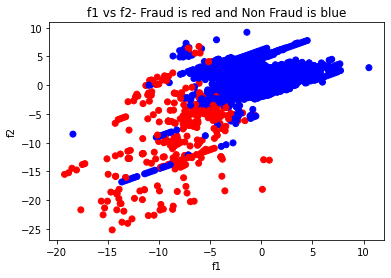

In [ ]:
### ORIGINAL SET OF FEATURES- V14 AND V17
import numpy as np
import matplotlib.pyplot as plt

f1f2=X_train.iloc[:,[14,17]].values #Q1
f1=f1f2[:,0]
f2=f1f2[:,1]
f1f2v=X_val.iloc[:,[14,17]].values
labl=y_train
color= ['red' if l == 1 else 'blue' for l in labl]
plt.scatter(f1, f2, color=color,label=labl) #Q2 AND Q3
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('f1 vs f2- Fraud is red and Non Fraud is blue')
plt.show()

In [ ]:
#gm3.fit(X_train) #fitting model to all X_train data points
gm3=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
gm3.fit(f1f2) #Q5 fitting Guassian model on training set of two features
ff1=gm3.score_samples(f1f2) 
fpr_1, tpr_1, _ = roc_curve(y_train, 1-ff1)
AUC1=auc(fpr_1, tpr_1)
print("AUC of Training set is:",AUC1)

ff2=gm3.score_samples(f1f2v)
fpr_2, tpr_2, _ = roc_curve(y_val, 1-ff2)
AUC2=auc(fpr_2, tpr_2)
print("AUC of Validation set is:",AUC2)


AUC of Training set is: 0.9599062719502927
AUC of Validation set is: 0.9604485071099381


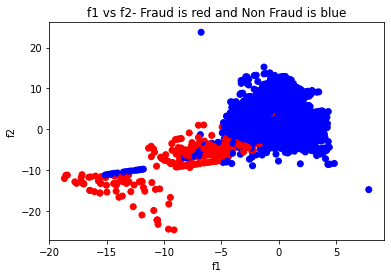

In [ ]:
### NEW SET OF FEATURES 1: V12 AND V10  
import numpy as np
import matplotlib.pyplot as plt

f1f2=X_train.iloc[:,[12,10]].values #Q1
f1=f1f2[:,0]
f2=f1f2[:,1]
f1f2v=X_val.iloc[:,[12,10]].values
labl=y_train
color= ['red' if l == 1 else 'blue' for l in labl]
plt.scatter(f1, f2, color=color,label=labl) #Q2 AND Q3
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('f1 vs f2- Fraud is red and Non Fraud is blue')
plt.show()


In [ ]:
#gm3.fit(X_train) #fitting model to all X_train data points
gm3=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
gm3.fit(f1f2) #Q5 fitting Guassian model on training set of two features
ff1=gm3.score_samples(f1f2) 
fpr_1, tpr_1, _ = roc_curve(y_train, 1-ff1)
AUC1=auc(fpr_1, tpr_1)
print("AUC of Training set is:",AUC1)

ff2=gm3.score_samples(f1f2v)
fpr_2, tpr_2, _ = roc_curve(y_val, 1-ff2)
AUC2=auc(fpr_2, tpr_2)
print("AUC of Validation set is:",AUC2)



AUC of Training set is: 0.927301947868384
AUC of Validation set is: 0.9314769862528066


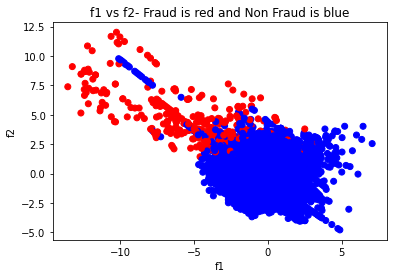

In [ ]:
### NEW SET OF FEATURES 2: V16 AND V11
import numpy as np
import matplotlib.pyplot as plt

f1f2=X_train.iloc[:,[16,11]].values #Q1
f1=f1f2[:,0]
f2=f1f2[:,1]
f1f2v=X_val.iloc[:,[16,11]].values
labl=y_train
color= ['red' if l == 1 else 'blue' for l in labl]
plt.scatter(f1, f2, color=color,label=labl) #Q2 AND Q3
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('f1 vs f2- Fraud is red and Non Fraud is blue')
plt.show()


In [ ]:
gm3=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
gm3.fit(f1f2) #Q5 fitting Guassian model on training set of two features
ff1=gm3.score_samples(f1f2) 
fpr_1, tpr_1, _ = roc_curve(y_train, 1-ff1)
AUC1=auc(fpr_1, tpr_1)
print("AUC of Training set is:",AUC1)

ff2=gm3.score_samples(f1f2v)
fpr_2, tpr_2, _ = roc_curve(y_val, 1-ff2)
AUC2=auc(fpr_2, tpr_2)
print("AUC of Validation set is:",AUC2)

AUC of Training set is: 0.9215316021928972
AUC of Validation set is: 0.8926283629416631


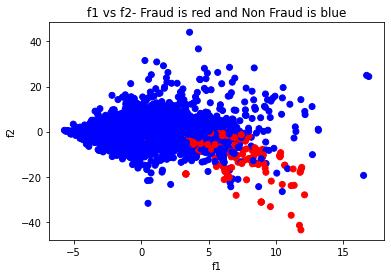

In [ ]:
### SET 3 : V4 AND V7
import numpy as np
import matplotlib.pyplot as plt

f1f2=X_train.iloc[:,[4,7]].values #Q1
f1=f1f2[:,0]
f2=f1f2[:,1]
f1f2v=X_val.iloc[:,[4,7]].values
labl=y_train
color= ['red' if l == 1 else 'blue' for l in labl]
plt.scatter(f1, f2, color=color,label=labl) #Q2 AND Q3
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('f1 vs f2- Fraud is red and Non Fraud is blue')
plt.show()


In [ ]:
gm3=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
gm3.fit(f1f2) #Q5
ff1=gm3.score_samples(f1f2) 
fpr_1, tpr_1, _ = roc_curve(y_train, 1-ff1)
AUC1=auc(fpr_1, tpr_1)
print("AUC of Training set is:",AUC1)

ff2=gm3.score_samples(f1f2v)
fpr_2, tpr_2, _ = roc_curve(y_val, 1-ff2)
AUC2=auc(fpr_2, tpr_2)
print("AUC of Validation set is:",AUC2)

AUC of Training set is: 0.931311550657323
AUC of Validation set is: 0.8877685921928546


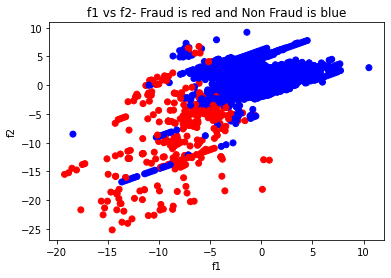

In [ ]:
 #ORIGINAL SET HAS THE HIGHEST VALIDATION SET AUC. THEREFORE, RECALCULATING THE PARAMETERS FOR ORIGINAL SET-V14 AND V17:

f1f2=X_train.iloc[:,[14,17]].values #Q1
f1=f1f2[:,0]
f2=f1f2[:,1]
f1f2v=X_val.iloc[:,[14,17]].values
labl=y_train
color= ['red' if l == 1 else 'blue' for l in labl]
plt.scatter(f1, f2, color=color,label=labl) #Q2 AND Q3
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('f1 vs f2- Fraud is red and Non Fraud is blue')
plt.show()

In [ ]:
#FINDING THE THRESHOLD 
gm3=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
gm3.fit(f1f2)
ff1it=gm3.score_samples(f1f2v)
F1IT=np.empty(50)
for it in range(50): #Let's look at 50 different k values
   mn_gmit = sorted(ff1it)[it] #We sort the points by probability, as before
   f1it=f1_score(y_val, ff1it < mn_gmit)
   F1IT[it]=f1it
   print('For a k of ',it,' the F1 is ', '%.3f' % f1it) 

For a k of  0  the F1 is  0.000
For a k of  1  the F1 is  0.061
For a k of  2  the F1 is  0.118
For a k of  3  the F1 is  0.171
For a k of  4  the F1 is  0.222
For a k of  5  the F1 is  0.216
For a k of  6  the F1 is  0.263
For a k of  7  the F1 is  0.308
For a k of  8  the F1 is  0.350
For a k of  9  the F1 is  0.390
For a k of  10  the F1 is  0.429
For a k of  11  the F1 is  0.465
For a k of  12  the F1 is  0.500
For a k of  13  the F1 is  0.489
For a k of  14  the F1 is  0.478
For a k of  15  the F1 is  0.511
For a k of  16  the F1 is  0.542
For a k of  17  the F1 is  0.531
For a k of  18  the F1 is  0.520
For a k of  19  the F1 is  0.510
For a k of  20  the F1 is  0.538
For a k of  21  the F1 is  0.566
For a k of  22  the F1 is  0.556
For a k of  23  the F1 is  0.545
For a k of  24  the F1 is  0.536
For a k of  25  the F1 is  0.526
For a k of  26  the F1 is  0.517
For a k of  27  the F1 is  0.542
For a k of  28  the F1 is  0.533
For a k of  29  the F1 is  0.557
For a k of  30  the 

In [ ]:
print('The maximum F1 of validation set for V14-V17 feature set is:',np.amax(F1IT))
print('The index of maximum F1 of validation set for V14-V17 feature set is:',np.argmax(F1IT)) ##finding index of maximum F1

The maximum F1 of validation set for V14-V17 feature set is: 0.6571428571428571
The index of maximum F1 of validation set for V14-V17 feature set is: 38


In [ ]:
thresholdit=sorted(ff1it)[np.argmax(F1IT)] #optimum threshold based on last cell's analysis
print('Threshold is:',thresholdit)


Threshold is: -29.384996213595553


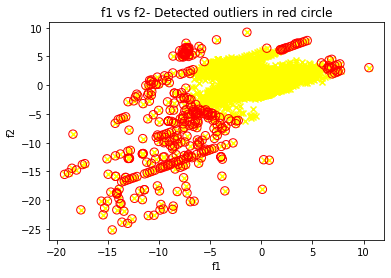

In [ ]:
outliers = np.nonzero(gm3.score_samples(f1f2)<thresholdit)[0]
#plt.scatter(X_train.values[outliers,0],X_train.values[outliers,1],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.scatter(f1, f2, color='yellow',marker="x") 
plt.scatter(f1[outliers],f2[outliers],marker="o",edgecolor="r",s=70,facecolor= "none")
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('f1 vs f2- Detected outliers in red circle')
plt.show()


In [ ]:
#PRECTION USING THE OPTIMAL THRESHOLD
for t in range(25419):
  if p_gmv[t]<threshold:
    print(p_gmv[t], "is fraud")
  else:
    print(p_gmv[t], "is not fraud")

Streaming output truncated to the last 5000 lines.
-6.499348111588492 is not fraud
-6.491351396589699 is not fraud
-6.461575991031882 is not fraud
-6.482926069884352 is not fraud
-6.503304048889514 is not fraud
-6.473994497732358 is not fraud
-6.497826608170015 is not fraud
-6.4538279716516005 is not fraud
-6.472214822901773 is not fraud
-6.442797803199919 is not fraud
-6.457093553142666 is not fraud
-6.50054711076535 is not fraud
-6.48726334755564 is not fraud
-6.479724842681913 is not fraud
-6.605326383483141 is fraud
-6.464032617083608 is not fraud
-7.001437448083428 is fraud
-6.465898067215178 is not fraud
-6.499185569065659 is not fraud
-6.468023412283664 is not fraud
-6.444907991108927 is not fraud
-6.449679647077073 is not fraud
-6.503304048889514 is not fraud
-6.4985107817465675 is not fraud
-6.503304048889514 is not fraud
-6.443085103747029 is not fraud
-6.49750608018137 is not fraud
-6.441811670074394 is not fraud
-6.452216636729656 is not fraud
-6.45485366907231 is not fraud

In [ ]:
##PART B

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1, f2, f3, angle ):
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure()
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='y', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()


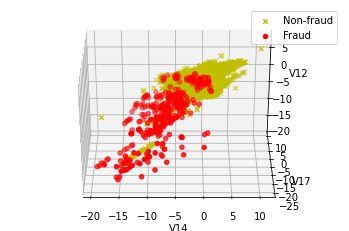

In [ ]:
plot_3d(X_train, y_train, f1="V14", f2="V17", f3="V12", angle=270 ) 


## **Part 4: Single feature model with two Gaussian distributions. [3 Marks]**


In [ ]:
## Q1
nf=X_train[df['Class']==0]
nf1=nf.iloc[:,14].values #non-fraudalent feature
#nf1_=nf1.to_numpy()
#nf11=nf1_.reshape(-1, 1)
g1=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
g1.fit(nf1.reshape(-1, 1))
#nfyval=y_val[df['Class']==0]

##Q2
f=X_train[df['Class']==1]
f1=f.iloc[:,14].values #fraudalent feature
#nf1_=f1.to_numpy()
#f11=nf1_.reshape(-1, 1)
#fyval=y_val[df['Class']==1]

g2=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
g2.fit(f1.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
##Q3

S1v=g1.score_samples(X_val.iloc[:,14].values.reshape(-1,1))
S1t=g1.score_samples(X_train.iloc[:,14].values.reshape(-1,1))
##Q4

S2v=g2.score_samples(X_val.iloc[:,14].values.reshape(-1,1))
S2t=g2.score_samples(X_train.iloc[:,14].values.reshape(-1,1))


In [ ]:
#PART 4.4
c=np.arange(0.0, 5.1, 0.1) # "c" CHANGED TO 0 TO 5.1 AFTER MANY TRIALS
P4F1t=np.empty(50)
P4F1v=np.empty(51)
P4F2t=np.empty(50)
P4F1vt=np.empty(50)
P4F2vt=np.empty(50)
P4F1t_=np.empty(50)
P4F2t_=np.empty(50)
count=0
P4F1=np.empty(51)
P4F2=np.empty(51)
for c1 in c:
  cc=c1*S2v[count]
  cc1=S1v[count]
  if cc1 < cc:
    for itt in range(50): 
      ##VALIDATION F1
      mn_gmmmv = sorted(S1v)[itt] 
      P4F11v=f1_score(y_val, S1v<mn_gmmmv)
      P4F1vt[itt]=P4F11v
      ##TRAINING F1
      #mn_gmmmt = sorted(S1t)[itt] 
      #P4F11t=f1_score(y_train, S1t<mn_gmmmt)
      #P4F1t_[itt]=P4F11t
    P4F1v[count]=np.amax(P4F1vt)
    #P4F1t[count]=np.amax(P4F1t_)
  else:
    for ittt in range(50):
      ##VALIDATION F1
      mn_gmmmmv = sorted(S2v)[ittt]
      P4F12v=f1_score(y_val, S2v<mn_gmmmmv)
      P4F2vt[ittt]=P4F12v
      ##TRAINING F1
      #mn_gmmmmt = sorted(S2t)[itt] 
      #P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
      #P4F2t_[itt]=P4F12t
    P4F1v[count]=np.amax(P4F2vt)
    #P4F1t[count]=np.amax(P4F2t_)
  count=count+1
    

In [ ]:
print('The best validation F1 score is',np.amax(P4F1v))
print('The optimum value of c is',c[np.argmax(P4F1v)] )

The best validation F1 score is 0.5762711864406779
The optimum value of c is 0.0


In [ ]:
count1=np.argmax(P4F1)
if S1v[count1]<(c[np.argmax(P4F1v)])*S2v[count1]:
  for ittt in range(50):
    mn_gmmmt = sorted(S1t)[itt] 
   
    P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    P4F1t_[ittt]=P4F11t
  P4F1t=np.amax(P4F1t_)
else:
  for itttt in range(50):
    mn_gmmmmt = sorted(S2t)[itttt] 
    P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    P4F2t_[itttt]=P4F12t
  P4F1t=np.amax(P4F2t_)
print('The corresponding F1 score of training set is:',P4F1t)
  

The corresponding F1 score of training set is: 0.19815668202764974


In [ ]:
## Q1
bvalF1=np.empty(30)
boptc=np.empty(30)
for feait in range(30):
  nf=X_train[df['Class']==0]
  nf1=nf.iloc[:,feait].values #non-fraudalent feature
#nf1_=nf1.to_numpy()
#nf11=nf1_.reshape(-1, 1)
  g1=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
  g1.fit(nf1.reshape(-1, 1))
#nfyval=y_val[df['Class']==0]

##Q2
  f=X_train[df['Class']==1]
  f1=f.iloc[:,feait].values #fraudalent feature
#nf1_=f1.to_numpy()
#f11=nf1_.reshape(-1, 1)
#fyval=y_val[df['Class']==1]

  g2=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
  g2.fit(f1.reshape(-1, 1))

#####


##Q3

  S1v=g1.score_samples(X_val.iloc[:,feait].values.reshape(-1,1))
  S1t=g1.score_samples(X_train.iloc[:,feait].values.reshape(-1,1))
##Q4

  S2v=g2.score_samples(X_val.iloc[:,feait].values.reshape(-1,1))
  S2t=g2.score_samples(X_train.iloc[:,feait].values.reshape(-1,1))

##

  c=np.arange(0.0, 5.1, 0.1)
  P4F1t=np.empty(50)
  P4F1v=np.empty(51)
  P4F2t=np.empty(50)
  P4F1vt=np.empty(50)
  P4F2vt=np.empty(50)
  P4F1t_=np.empty(50)
  P4F2t_=np.empty(50)
  count=0
  P4F1=np.empty(51)
  P4F2=np.empty(51)
  for c1 in c:
    cc=c1*S2v[count]
    cc1=S1v[count]
    if cc1 < cc:
      for itt in range(50): 
      ##VALIDATION F1
        mn_gmmmv = sorted(S1v)[itt] 
        P4F11v=f1_score(y_val, S1v<mn_gmmmv)
        P4F1vt[itt]=P4F11v
      ##TRAINING F1
      #mn_gmmmt = sorted(S1t)[itt] 
      #P4F11t=f1_score(y_train, S1t<mn_gmmmt)
      #P4F1t_[itt]=P4F11t
      P4F1v[count]=np.amax(P4F1vt)
    #P4F1t[count]=np.amax(P4F1t_)
    else:
      for ittt in range(50):
      ##VALIDATION F1
        mn_gmmmmv = sorted(S2v)[ittt]
        P4F12v=f1_score(y_val, S2v<mn_gmmmmv)
        P4F2vt[ittt]=P4F12v
      ##TRAINING F1
      #mn_gmmmmt = sorted(S2t)[itt] 
      #P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
      #P4F2t_[itt]=P4F12t
      P4F1v[count]=np.amax(P4F2vt)
    #P4F1t[count]=np.amax(P4F2t_)
    count=count+1


##
  bvalF1[feait]=np.amax(P4F1v)
  boptc[feait]=c[np.argmax(P4F1v)]
  print('The best validation F1 score is',bvalF1[feait])
  print('The optimum value of c is',boptc[feait] )

##

  count1=np.argmax(P4F1)
  if S1v[count1]<(c[np.argmax(P4F1v)])*S2v[count1]:
    for ittt in range(50):
      mn_gmmmt = sorted(S1t)[itt] 
   
      P4F11t=f1_score(y_train, S1t<mn_gmmmt)
      P4F1t_[ittt]=P4F11t
    P4F1t=np.amax(P4F1t_)
  else:
    for itttt in range(50):
      mn_gmmmmt = sorted(S2t)[itttt] 
      P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
      P4F2t_[itttt]=P4F12t
    P4F1t=np.amax(P4F2t_)
  P4F1tt[feait]=P4F1t
  print('The corresponding F1 score of training set is:',P4F1tt[feait])
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


The best validation F1 score is 0.0
The optimum value of c is 0.0


In [ ]:
bstf1fea=np.argmax(bvalF1)
bstf1fea1=X_train.columns.values[bstf1fea]
print('The best F1 score for validation set is',bvalF1[bstf1fea],'and the best F1 score for training set is',P4F1tt[bstf1fea],'for feature',bstf1fea1,'with c value of',boptc[bstf1fea])

## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**




In [ ]:
## MODEL NO. 1: 2 GUASSIAN WITH 1 FEATURE-V14 AND '1' COMPONENT FOR nonfraud and '1' components for fraud feature
md=1
nf=X_train[df['Class']==0]
nf1=nf.iloc[:,14].values #non-fraudalent feature
#nf1_=nf1.to_numpy()
#nf11=nf1_.reshape(-1, 1)
g1=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
g1.fit(nf1.reshape(-1, 1))
#nfyval=y_val[df['Class']==0]

##Q2
f=X_train[df['Class']==1]
f1=f.iloc[:,14].values #fraudalent feature
#nf1_=f1.to_numpy()
#f11=nf1_.reshape(-1, 1)
#fyval=y_val[df['Class']==1]

g2=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
g2.fit(f1.reshape(-1, 1))

#####


##Q3

S1v=g1.score_samples(X_val.iloc[:,14].values.reshape(-1,1))
S1t=g1.score_samples(X_train.iloc[:,14].values.reshape(-1,1))
##Q4

S2v=g2.score_samples(X_val.iloc[:,14].values.reshape(-1,1))
S2t=g2.score_samples(X_train.iloc[:,14].values.reshape(-1,1))

fpr_1, tpr_1, _ = roc_curve(y_train, 1-S1t)
AUC1=auc(fpr_1, tpr_1)
print("AUC of Training set is:",AUC1)

fpr_2, tpr_2, _ = roc_curve(y_val, 1-S1v)
AUC2=auc(fpr_2, tpr_2)
print("AUC of Validation set is:",AUC2)

##

c=np.arange(0.0, 5.1, 0.1)
P4F1t=np.empty(50)
P4F1v=np.empty(51)
P4F2t=np.empty(50)
P4F1vt=np.empty(50)
P4F2vt=np.empty(50)
P4F1t_=np.empty(50)
P4F2t_=np.empty(50)
count=0
P4F1=np.empty(51)
P4F2=np.empty(51)
for c1 in c:
  cc=c1*S2v[count]
  cc1=S1v[count]
  if cc1 < cc:
    for itt in range(50): 
    ##VALIDATION F1
      mn_gmmmv = sorted(S1v)[itt] 
      P4F11v=f1_score(y_val, S1v<mn_gmmmv)
      P4F1vt[itt]=P4F11v
    ##TRAINING F1
    #mn_gmmmt = sorted(S1t)[itt] 
    #P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    #P4F1t_[itt]=P4F11t
    P4F1v[count]=np.amax(P4F1vt)
  #P4F1t[count]=np.amax(P4F1t_)
  else:
    for ittt in range(50):
    ##VALIDATION F1
      mn_gmmmmv = sorted(S2v)[ittt]
      P4F12v=f1_score(y_val, S2v<mn_gmmmmv)
      P4F2vt[ittt]=P4F12v
    ##TRAINING F1
    #mn_gmmmmt = sorted(S2t)[itt] 
    #P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    #P4F2t_[itt]=P4F12t
    P4F1v[count]=np.amax(P4F2vt)
  #P4F1t[count]=np.amax(P4F2t_)
  count=count+1


##
bvalF1=np.amax(P4F1v)
boptc=c[np.argmax(P4F1v)]
print('The best validation F1 score is',bvalF1)
print('The optimum value of c is',boptc )

##

count1=np.argmax(P4F1)
if S1v[count1]<(c[np.argmax(P4F1v)])*S2v[count1]:
  for ittt in range(50):
    mn_gmmmt = sorted(S1t)[itt] 
  
    P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    P4F1t_[ittt]=P4F11t
  P4F1t=np.amax(P4F1t_)
else:
  for itttt in range(50):
    mn_gmmmmt = sorted(S2t)[itttt] 
    P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    P4F2t_[itttt]=P4F12t
  P4F1t=np.amax(P4F2t_)
P4F1tt=P4F1t
print('The corresponding F1 score of training set is:',P4F1tt)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


AUC of Training set is: 0.9505263398722248
AUC of Validation set is: 0.9532007031157679
The best validation F1 score is 0.5762711864406779
The optimum value of c is 0.0
The corresponding F1 score of training set is: 0.19815668202764974


In [ ]:
## MODEL NO. 2: 2 GUASSIAN WITH 2 FEATURES V14 AND V17 AND '1' COMPONENT FOR nonfraud while '2' components for fraud feature
md=2
nf=X_train[df['Class']==0]
nf1=nf.iloc[:,[14,17]].values #non-fraudalent feature

g1=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
#g1.fit(nf1.reshape(-1, 1))
g1.fit(nf1)

##Q2
f=X_train[df['Class']==1]
f1=f.iloc[:,[14,17]].values #fraudalent feature
#nf1_=f1.to_numpy()
#f11=nf1_.reshape(-1, 1)
#fyval=y_val[df['Class']==1]

g2=GaussianMixture(n_components = 2,covariance_type = 'full', random_state=0, )
g2.fit(f1)

#####


##Q3

S1v=g1.score_samples(X_val.iloc[:,[14,17]])
S1t=g1.score_samples(X_train.iloc[:,[14,17]])
##Q4

S2v=g2.score_samples(X_val.iloc[:,[14,17]])
S2t=g2.score_samples(X_train.iloc[:,[14,17]])


##

c=np.arange(0.0, 5.1, 0.1)
P4F1t=np.empty(50)
P4F1v=np.empty(51)
P4F2t=np.empty(50)
P4F1vt=np.empty(50)
P4F2vt=np.empty(50)
P4F1t_=np.empty(50)
P4F2t_=np.empty(50)
count=0
P4F1=np.empty(51)
P4F2=np.empty(51)
for c1 in c:
  cc=c1*S2v[count]
  cc1=S1v[count]
  if cc1 < cc:
    for itt in range(50): 
    ##VALIDATION F1
      mn_gmmmv = sorted(S1v)[itt] 
      P4F11v=f1_score(y_val, S1v<mn_gmmmv)
      P4F1vt[itt]=P4F11v
    ##TRAINING F1
    #mn_gmmmt = sorted(S1t)[itt] 
    #P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    #P4F1t_[itt]=P4F11t
    P4F1v[count]=np.amax(P4F1vt)
  #P4F1t[count]=np.amax(P4F1t_)
  else:
    for ittt in range(50):
    ##VALIDATION F1
      mn_gmmmmv = sorted(S2v)[ittt]
      P4F12v=f1_score(y_val, S2v<mn_gmmmmv)
      P4F2vt[ittt]=P4F12v
    ##TRAINING F1
    #mn_gmmmmt = sorted(S2t)[itt] 
    #P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    #P4F2t_[itt]=P4F12t
    P4F1v[count]=np.amax(P4F2vt)
  #P4F1t[count]=np.amax(P4F2t_)
  count=count+1


##
bvalF1=np.amax(P4F1v)
boptc=c[np.argmax(P4F1v)]
print('The best validation F1 score is',bvalF1)
print('The optimum value of c is',boptc )

##

count1=np.argmax(P4F1)
if S1v[count1]<(c[np.argmax(P4F1v)])*S2v[count1]:
  for ittt in range(50):
    mn_gmmmt = sorted(S1t)[itt] 
  
    P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    P4F1t_[ittt]=P4F11t
  P4F1t=np.amax(P4F1t_)
else:
  for itttt in range(50):
    mn_gmmmmt = sorted(S2t)[itttt] 
    P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    P4F2t_[itttt]=P4F12t
  P4F1t=np.amax(P4F2t_)
P4F1tt=P4F1t
print('The corresponding F1 score of training set is:',P4F1tt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


The best validation F1 score is 0.6666666666666666
The optimum value of c is 0.0
The corresponding F1 score of training set is: 0.20276497695852533


In [ ]:
## MODEL NO. 3: 2 GUASSIAN WITH 3 FEATURES V14,V17 AND V12 AND '1' COMPONENT FOR nonfraud while '2' components for fraud feature
md=2
nf=X_train[df['Class']==0]
nf1=nf.iloc[:,[14,17,12]].values #non-fraudalent feature

g1=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
#g1.fit(nf1.reshape(-1, 1))
g1.fit(nf1)

##Q2
f=X_train[df['Class']==1]
f1=f.iloc[:,[14,17,12]].values #fraudalent feature


g2=GaussianMixture(n_components = 2,covariance_type = 'full', random_state=0, )
g2.fit(f1)

#####


##Q3

S1v=g1.score_samples(X_val.iloc[:,[14,17,12]])
S1t=g1.score_samples(X_train.iloc[:,[14,17,12]])
##Q4

S2v=g2.score_samples(X_val.iloc[:,[14,17,12]])
S2t=g2.score_samples(X_train.iloc[:,[14,17,12]])

##

c=np.arange(0.0, 5.1, 0.1)
P4F1t=np.empty(50)
P4F1v=np.empty(51)
P4F2t=np.empty(50)
P4F1vt=np.empty(50)
P4F2vt=np.empty(50)
P4F1t_=np.empty(50)
P4F2t_=np.empty(50)
count=0
P4F1=np.empty(51)
P4F2=np.empty(51)
for c1 in c:
  cc=c1*S2v[count]
  cc1=S1v[count]
  if cc1 < cc:
    for itt in range(50): 
    ##VALIDATION F1
      mn_gmmmv = sorted(S1v)[itt] 
      P4F11v=f1_score(y_val, S1v<mn_gmmmv)
      P4F1vt[itt]=P4F11v
    ##TRAINING F1
    #mn_gmmmt = sorted(S1t)[itt] 
    #P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    #P4F1t_[itt]=P4F11t
    P4F1v[count]=np.amax(P4F1vt)
  #P4F1t[count]=np.amax(P4F1t_)
  else:
    for ittt in range(50):
    ##VALIDATION F1
      mn_gmmmmv = sorted(S2v)[ittt]
      P4F12v=f1_score(y_val, S2v<mn_gmmmmv)
      P4F2vt[ittt]=P4F12v
    ##TRAINING F1
    #mn_gmmmmt = sorted(S2t)[itt] 
    #P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    #P4F2t_[itt]=P4F12t
    P4F1v[count]=np.amax(P4F2vt)
  #P4F1t[count]=np.amax(P4F2t_)
  count=count+1


##
bvalF1=np.amax(P4F1v)
boptc=c[np.argmax(P4F1v)]
print('The best validation F1 score is',bvalF1)
print('The optimum value of c is',boptc )

##

count1=np.argmax(P4F1)
if S1v[count1]<(c[np.argmax(P4F1v)])*S2v[count1]:
  for ittt in range(50):
    mn_gmmmt = sorted(S1t)[itt] 
  
    P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    P4F1t_[ittt]=P4F11t
  P4F1t=np.amax(P4F1t_)
else:
  for itttt in range(50):
    mn_gmmmmt = sorted(S2t)[itttt] 
    P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    P4F2t_[itttt]=P4F12t
  P4F1t=np.amax(P4F2t_)
P4F1tt=P4F1t
print('The corresponding F1 score of training set is:',P4F1tt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


The best validation F1 score is 0.6896551724137931
The optimum value of c is 0.0
The corresponding F1 score of training set is: 0.2068965517241379


In [ ]:
## MODEL NO. 4 : 2 GUASSIAN WITH 5 FEATURES V14,V17,V12,V10,V16 AND '1' COMPONENT FOR nonfraud while '2' components for fraud feature
md=2
nf=X_train[df['Class']==0]
nf1=nf.iloc[:,[14,17,12,10,16]].values #non-fraudalent feature

g1=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
#g1.fit(nf1.reshape(-1, 1))
g1.fit(nf1)

##Q2
f=X_train[df['Class']==1]
f1=f.iloc[:,[14,17,12,10,16]].values #fraudalent feature


g2=GaussianMixture(n_components = 2,covariance_type = 'full', random_state=0, )
g2.fit(f1)

#####


##Q3

S1v=g1.score_samples(X_val.iloc[:,[14,17,12,10,16]])
S1t=g1.score_samples(X_train.iloc[:,[14,17,12,10,16]])
##Q4

S2v=g2.score_samples(X_val.iloc[:,[14,17,12,10,16]])
S2t=g2.score_samples(X_train.iloc[:,[14,17,12,10,16]])

##

c=np.arange(0.0, 5.1, 0.1)
P4F1t=np.empty(50)
P4F1v=np.empty(51)
P4F2t=np.empty(50)
P4F1vt=np.empty(50)
P4F2vt=np.empty(50)
P4F1t_=np.empty(50)
P4F2t_=np.empty(50)
count=0
P4F1=np.empty(51)
P4F2=np.empty(51)
for c1 in c:
  cc=c1*S2v[count]
  cc1=S1v[count]
  if cc1 < cc:
    for itt in range(50): 
    ##VALIDATION F1
      mn_gmmmv = sorted(S1v)[itt] 
      P4F11v=f1_score(y_val, S1v<mn_gmmmv)
      P4F1vt[itt]=P4F11v
    ##TRAINING F1
    #mn_gmmmt = sorted(S1t)[itt] 
    #P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    #P4F1t_[itt]=P4F11t
    P4F1v[count]=np.amax(P4F1vt)
  #P4F1t[count]=np.amax(P4F1t_)
  else:
    for ittt in range(50):
    ##VALIDATION F1
      mn_gmmmmv = sorted(S2v)[ittt]
      P4F12v=f1_score(y_val, S2v<mn_gmmmmv)
      P4F2vt[ittt]=P4F12v
    ##TRAINING F1
    #mn_gmmmmt = sorted(S2t)[itt] 
    #P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    #P4F2t_[itt]=P4F12t
    P4F1v[count]=np.amax(P4F2vt)
  #P4F1t[count]=np.amax(P4F2t_)
  count=count+1


##
bvalF1=np.amax(P4F1v)
boptc=c[np.argmax(P4F1v)]
print('The best validation F1 score is',bvalF1)
print('The optimum value of c is',boptc )

##

count1=np.argmax(P4F1)
if S1v[count1]<(c[np.argmax(P4F1v)])*S2v[count1]:
  for ittt in range(50):
    mn_gmmmt = sorted(S1t)[itt] 
  
    P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    P4F1t_[ittt]=P4F11t
  P4F1t=np.amax(P4F1t_)
else:
  for itttt in range(50):
    mn_gmmmmt = sorted(S2t)[itttt] 
    P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    P4F2t_[itttt]=P4F12t
  P4F1t=np.amax(P4F2t_)
P4F1tt=P4F1t
print('The corresponding F1 score of training set is:',P4F1tt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


The best validation F1 score is 0.7619047619047619
The optimum value of c is 0.0
The corresponding F1 score of training set is: 0.2114942528735632


In [ ]:
## MODEL NO. 5 : 2 GUASSIAN WITH 5 FEATURES V14,V17,V12,V10,V16 AND '3' COMPONENT FOR nonfraud while '1' components for fraud feature
md=2
nf=X_train[df['Class']==0]
nf1=nf.iloc[:,[14,17,12,10,16]].values #non-fraudalent feature

g1=GaussianMixture(n_components = 3,covariance_type = 'full', random_state=0, )
#g1.fit(nf1.reshape(-1, 1))
g1.fit(nf1)

##Q2
f=X_train[df['Class']==1]
f1=f.iloc[:,[14,17,12,10,16]].values #fraudalent feature


g2=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
g2.fit(f1)

#####


##Q3

S1v=g1.score_samples(X_val.iloc[:,[14,17,12,10,16]])
S1t=g1.score_samples(X_train.iloc[:,[14,17,12,10,16]])
##Q4

S2v=g2.score_samples(X_val.iloc[:,[14,17,12,10,16]])
S2t=g2.score_samples(X_train.iloc[:,[14,17,12,10,16]])

##

c=np.arange(0.0, 5.1, 0.1)
P4F1t=np.empty(50)
P4F1v=np.empty(51)
P4F2t=np.empty(50)
P4F1vt=np.empty(50)
P4F2vt=np.empty(50)
P4F1t_=np.empty(50)
P4F2t_=np.empty(50)
count=0
P4F1=np.empty(51)
P4F2=np.empty(51)
for c1 in c:
  cc=c1*S2v[count]
  cc1=S1v[count]
  if cc1 < cc:
    for itt in range(50): 
    ##VALIDATION F1
      mn_gmmmv = sorted(S1v)[itt] 
      P4F11v=f1_score(y_val, S1v<mn_gmmmv)
      P4F1vt[itt]=P4F11v
    ##TRAINING F1
    #mn_gmmmt = sorted(S1t)[itt] 
    #P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    #P4F1t_[itt]=P4F11t
    P4F1v[count]=np.amax(P4F1vt)
  #P4F1t[count]=np.amax(P4F1t_)
  else:
    for ittt in range(50):
    ##VALIDATION F1
      mn_gmmmmv = sorted(S2v)[ittt]
      P4F12v=f1_score(y_val, S2v<mn_gmmmmv)
      P4F2vt[ittt]=P4F12v
    ##TRAINING F1
    #mn_gmmmmt = sorted(S2t)[itt] 
    #P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    #P4F2t_[itt]=P4F12t
    P4F1v[count]=np.amax(P4F2vt)
  #P4F1t[count]=np.amax(P4F2t_)
  count=count+1


##
bvalF1=np.amax(P4F1v)
boptc=c[np.argmax(P4F1v)]
print('The best validation F1 score is',bvalF1)
print('The optimum value of c is',boptc )

##

count1=np.argmax(P4F1)
if S1v[count1]<(c[np.argmax(P4F1v)])*S2v[count1]:
  for ittt in range(50):
    mn_gmmmt = sorted(S1t)[itt] 
  
    P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    P4F1t_[ittt]=P4F11t
  P4F1t=np.amax(P4F1t_)
else:
  for itttt in range(50):
    mn_gmmmmt = sorted(S2t)[itttt] 
    P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    P4F2t_[itttt]=P4F12t
  P4F1t=np.amax(P4F2t_)
P4F1tt=P4F1t
print('The corresponding F1 score of training set is:',P4F1tt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


The best validation F1 score is 0.7042253521126761
The optimum value of c is 0.0
The corresponding F1 score of training set is: 0.2206896551724138


In [ ]:
## MODEL NO. 6 : 2 GUASSIAN WITH 5 FEATURES V14,V17,V12,V10,V16 AND '1' COMPONENT FOR nonfraud while '2' components for fraud feature
md=2
nf=X_train[df['Class']==0]
nf1=nf.iloc[:,[14,17,12,10,16]].values #non-fraudalent feature

g1=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
#g1.fit(nf1.reshape(-1, 1))
g1.fit(nf1)

##Q2
f=X_train[df['Class']==1]
f1=f.iloc[:,[14,17,12,10,16]].values #fraudalent feature


g2=GaussianMixture(n_components = 2,covariance_type = 'full', random_state=0, )
g2.fit(f1)

#####


##Q3

S1v=g1.score_samples(X_val.iloc[:,[14,17,12,10,16]])
S1t=g1.score_samples(X_train.iloc[:,[14,17,12,10,16]])
##Q4

S2v=g2.score_samples(X_val.iloc[:,[14,17,12,10,16]])
S2t=g2.score_samples(X_train.iloc[:,[14,17,12,10,16]])

##

c=np.arange(0.0, 5.1, 0.1)
P4F1t=np.empty(50)
P4F1v=np.empty(51)
P4F2t=np.empty(50)
P4F1vt=np.empty(50)
P4F2vt=np.empty(50)
P4F1t_=np.empty(50)
P4F2t_=np.empty(50)
count=0
P4F1=np.empty(51)
P4F2=np.empty(51)
for c1 in c:
  cc=c1*S2v[count]
  cc1=S1v[count]
  if cc1 < cc:
    for itt in range(50): 
    ##VALIDATION F1
      mn_gmmmv = sorted(S1v)[itt] 
      P4F11v=f1_score(y_val, S1v<mn_gmmmv)
      P4F1vt[itt]=P4F11v
    ##TRAINING F1
    #mn_gmmmt = sorted(S1t)[itt] 
    #P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    #P4F1t_[itt]=P4F11t
    P4F1v[count]=np.amax(P4F1vt)
  #P4F1t[count]=np.amax(P4F1t_)
  else:
    for ittt in range(50):
    ##VALIDATION F1
      mn_gmmmmv = sorted(S2v)[ittt]
      P4F12v=f1_score(y_val, S2v<mn_gmmmmv)
      P4F2vt[ittt]=P4F12v
    ##TRAINING F1
    #mn_gmmmmt = sorted(S2t)[itt] 
    #P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    #P4F2t_[itt]=P4F12t
    P4F1v[count]=np.amax(P4F2vt)
  #P4F1t[count]=np.amax(P4F2t_)
  count=count+1


##
bvalF1=np.amax(P4F1v)
boptc=c[np.argmax(P4F1v)]
print('The best validation F1 score is',bvalF1)
print('The optimum value of c is',boptc )

##

count1=np.argmax(P4F1)
if S1v[count1]<(c[np.argmax(P4F1v)])*S2v[count1]:
  for ittt in range(50):
    mn_gmmmt = sorted(S1t)[itt] 
  
    P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    P4F1t_[ittt]=P4F11t
  P4F1t=np.amax(P4F1t_)
else:
  for itttt in range(50):
    mn_gmmmmt = sorted(S2t)[itttt] 
    P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    P4F2t_[itttt]=P4F12t
  P4F1t=np.amax(P4F2t_)
P4F1tt=P4F1t
print('The corresponding F1 score of training set is:',P4F1tt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


The best validation F1 score is 0.7619047619047619
The optimum value of c is 0.0
The corresponding F1 score of training set is: 0.2114942528735632


In [ ]:
## MODEL NO. 7 : 1 GUASSIAN WITH 2 FEATURES V14 AND V17 AND '1' COMPONENT FOR ALL CLASSES
f1f2=X_train.iloc[:,[14,17]].values #Q1
f1=f1f2[:,0]
f2=f1f2[:,1]
f1f2v=X_val.iloc[:,[14,17]].values

gm3=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
gm3.fit(f1f2)
ff1it=gm3.score_samples(f1f2v)
fflittrain=gm3.score_samples(f1f2)
fpr_1, tpr_1, _ = roc_curve(y_train, 1-fflittrain)
AUC1=auc(fpr_1, tpr_1)
print("AUC of Training set is:",AUC1)

fpr_2, tpr_2, _ = roc_curve(y_val, 1-ff1it)
AUC2=auc(fpr_2, tpr_2)
print("AUC of Validation set is:",AUC2)
F1IT=np.empty(50)
F1ITt=np.empty(50)
for it in range(50): #Let's look at 3 different k values
   mn_gmit = sorted(ff1it)[it] #We sort the points by probability, as before
   f1it=f1_score(y_val, ff1it < mn_gmit)
   F1IT[it]=f1it
print('The maximum F1 of validation set for V14-V17 feature set is:',np.amax(F1IT))

for it in range(50): #Let's look at 3 different k values
   mn_gmit = sorted(fflittrain)[it] #We sort the points by probability, as before
   f1it=f1_score(y_train, fflittrain < mn_gmit)
   F1ITt[it]=f1it
print('The maximum F1 of training set for V14-V17 feature set is:',np.amax(F1ITt))


AUC of Training set is: 0.9599062719502927
AUC of Validation set is: 0.9604485071099381
The maximum F1 of validation set for V14-V17 feature set is: 0.6571428571428571
The maximum F1 of training set for V14-V17 feature set is: 0.2037037037037037


In [ ]:
## MODEL NO. 8 : 1 GUASSIAN WITH 5 FEATURES AND '1' COMPONENT FOR ALL CLASSES
f1f2=X_train.iloc[:,[14,17,12,10,16]].values #Q1
f1=f1f2[:,0]
f2=f1f2[:,1]
f1f2v=X_val.iloc[:,[14,17,12,10,16]].values

gm3=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
gm3.fit(f1f2)
ff1it=gm3.score_samples(f1f2v)
fflittrain=gm3.score_samples(f1f2)
fpr_1, tpr_1, _ = roc_curve(y_train, 1-fflittrain)
AUC1=auc(fpr_1, tpr_1)
print("AUC of Training set is:",AUC1)

fpr_2, tpr_2, _ = roc_curve(y_val, 1-ff1it)
AUC2=auc(fpr_2, tpr_2)
print("AUC of Validation set is:",AUC2)

F1IT=np.empty(50)
F1ITt=np.empty(50)
for it in range(50): #Let's look at 3 different k values
   mn_gmit = sorted(ff1it)[it] #We sort the points by probability, as before
   f1it=f1_score(y_val, ff1it < mn_gmit)
   F1IT[it]=f1it
print('The maximum F1 of validation set is:',np.amax(F1IT))

for it in range(50): #Let's look at 3 different k values
   mn_gmit = sorted(fflittrain)[it] #We sort the points by probability, as before
   f1it=f1_score(y_train, fflittrain < mn_gmit)
   F1ITt[it]=f1it
print('The maximum F1 of training set is:',np.amax(F1ITt))


AUC of Training set is: 0.9598573165087283
AUC of Validation set is: 0.9416778272344113
The maximum F1 of validation set is: 0.6071428571428571
The maximum F1 of training set is: 0.21247113163972284


In [ ]:

## MODEL NO. 9 : 1 GUASSIAN WITH 2 FEATURES AND '3' COMPONENT FOR ALL CLASSES
f1f2=X_train.iloc[:,[14,17]].values #Q1
f1=f1f2[:,0]
f2=f1f2[:,1]
f1f2v=X_val.iloc[:,[14,17]].values

gm3=GaussianMixture(n_components = 3,covariance_type = 'full', random_state=0, )
gm3.fit(f1f2)
ff1it=gm3.score_samples(f1f2v)
fflittrain=gm3.score_samples(f1f2)

fpr_1, tpr_1, _ = roc_curve(y_train, 1-fflittrain)
AUC1=auc(fpr_1, tpr_1)
print("AUC of Training set is:",AUC1)

fpr_2, tpr_2, _ = roc_curve(y_val, 1-ff1it)
AUC2=auc(fpr_2, tpr_2)
print("AUC of Validation set is:",AUC2)
F1IT=np.empty(50)
F1ITt=np.empty(50)
for it in range(50): #Let's look at 3 different k values
   mn_gmit = sorted(ff1it)[it] #We sort the points by probability, as before
   f1it=f1_score(y_val, ff1it < mn_gmit)
   F1IT[it]=f1it
print('The maximum F1 of validation set for V14-V17 feature set is:',np.amax(F1IT))

for it in range(50): #Let's look at 3 different k values
   mn_gmit = sorted(fflittrain)[it] #We sort the points by probability, as before
   f1it=f1_score(y_train, fflittrain < mn_gmit)
   F1ITt[it]=f1it
print('The maximum F1 of training set for V14-V17 feature set is:',np.amax(F1ITt))

AUC of Training set is: 0.9597604836754504
AUC of Validation set is: 0.9621435183361562
The maximum F1 of validation set for V14-V17 feature set is: 0.5217391304347825
The maximum F1 of training set for V14-V17 feature set is: 0.2114942528735632


In [ ]:
## MODEL NO. 10 : 1 GUASSIAN WITH 1 FEATURES AND '1' COMPONENT FOR ALL CLASSES
f1f2=X_train.iloc[:,14].values #Q1
#f1=f1f2[:,0]
#f2=f1f2[:,1]
f1f2v=X_val.iloc[:,14].values

gm3=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
gm3.fit(f1f2.reshape(-1,1))
ff1it=gm3.score_samples(f1f2v.reshape(-1,1))
fflittrain=gm3.score_samples(f1f2.reshape(-1,1))
fpr_1, tpr_1, _ = roc_curve(y_train, 1-fflittrain)
AUC1=auc(fpr_1, tpr_1)
print("AUC of Training set is:",AUC1)

fpr_2, tpr_2, _ = roc_curve(y_val, 1-ff1it)
AUC2=auc(fpr_2, tpr_2)
print("AUC of Validation set is:",AUC2)
F1IT=np.empty(50)
F1ITt=np.empty(50)
for it in range(50): #Let's look at 3 different k values
   mn_gmit = sorted(ff1it)[it] #We sort the points by probability, as before
   f1it=f1_score(y_val, ff1it < mn_gmit)
   F1IT[it]=f1it
print('The maximum F1 of validation set is:',np.amax(F1IT))

for it in range(50): #Let's look at 3 different k values
   mn_gmit = sorted(fflittrain)[it] #We sort the points by probability, as before
   f1it=f1_score(y_train, fflittrain < mn_gmit)
   F1ITt[it]=f1it
print('The maximum F1 of training set is:',np.amax(F1ITt))

AUC of Training set is: 0.9503875469430818
AUC of Validation set is: 0.9523698152597786
The maximum F1 of validation set is: 0.5762711864406779
The maximum F1 of training set is: 0.19861431870669743


In [ ]:
## MODEL NO. 11 : 1 GUASSIAN WITH 1 FEATURES AND '5' COMPONENT FOR ALL CLASSES
f1f2=X_train.iloc[:,14].values #Q1
#f1=f1f2[:,0]
#f2=f1f2[:,1]
f1f2v=X_val.iloc[:,14].values

gm3=GaussianMixture(n_components = 5,covariance_type = 'full', random_state=0, )
gm3.fit(f1f2.reshape(-1,1))
ff1it=gm3.score_samples(f1f2v.reshape(-1,1))
fflittrain=gm3.score_samples(f1f2.reshape(-1,1))
fpr_1, tpr_1, _ = roc_curve(y_train, 1-fflittrain)
AUC1=auc(fpr_1, tpr_1)
print("AUC of Training set is:",AUC1)

fpr_2, tpr_2, _ = roc_curve(y_val, 1-ff1it)
AUC2=auc(fpr_2, tpr_2)
print("AUC of Validation set is:",AUC2)
F1IT=np.empty(50)
F1ITt=np.empty(50)
for it in range(50): #Let's look at 3 different k values
   mn_gmit = sorted(ff1it)[it] #We sort the points by probability, as before
   f1it=f1_score(y_val, ff1it < mn_gmit)
   F1IT[it]=f1it
print('The maximum F1 of validation set is:',np.amax(F1IT))

for it in range(50): #Let's look at 3 different k values
   mn_gmit = sorted(fflittrain)[it] #We sort the points by probability, as before
   f1it=f1_score(y_train, fflittrain < mn_gmit)
   F1ITt[it]=f1it
print('The maximum F1 of training set is:',np.amax(F1ITt))

AUC of Training set is: 0.9510381500281253
AUC of Validation set is: 0.958528232953874
The maximum F1 of validation set is: 0.4615384615384615
The maximum F1 of training set is: 0.19815668202764974


In [ ]:
pt5col=['Model Number','Number of Features','Number of Guassian distribution','Number of components for Fraud transaction',
        'Number of components for Valid transaction',
        'AUC score for training set','AUC score for validation set',
        'Best F1 score for training set','Best F1 score for validation set']

datapt5=np.array([ ['1','1','2','1','1','0.95','0.95','0.198','0.576'],['2','2','2','2','1','N/A','N/A','0.202','0.666'],
                  ['3','3','2','2','1','N/A','N/A','0.206','0.689'],['4','5','2','2','1','N/A','N/A','0.211','0.761'],
                  ['5','5','2','1','3','N/A','N/A','0.220','0.704'],['6','5','2','2','1','N/A','N/A','0.211','0.761'],
                  ['7','2','1','1','1','0.95','0.96','0.203','0.657'],['8','5','1','1','1','0.95','0.94','0.212','0.607'],
                  ['9','2','1','3','3','0.95','0.96','0.211','0.521'],['10','1','1','1','1','0.95','0.95','0.198','0.576'],
                  ['11','1','1','5','5','0.95','0.96','0.198','0.461'] ])
datapt5

pt=pd.DataFrame(datapt5,columns=pt5col)
pt


pt.sort_values(by='Best F1 score for validation set', ascending=False)


,Model Number,Number of Features,Number of Guassian distribution,Number of components for Fraud transaction,Number of components for Valid transaction,AUC score for training set,AUC score for validation set,Best F1 score for training set,Best F1 score for validation set
3,4,5,2,2,1,N/A,N/A,0.211,0.761
5,6,5,2,2,1,N/A,N/A,0.211,0.761
4,5,5,2,1,3,N/A,N/A,0.220,0.704
2,3,3,2,2,1,N/A,N/A,0.206,0.689
1,2,2,2,2,1,N/A,N/A,0.202,0.666
6,7,2,1,1,1,0.95,0.96,0.203,0.657
7,8,5,1,1,1,0.95,0.94,0.212,0.607
0,1,1,2,1,1,0.95,0.95,0.198,0.576
9,10,1,1,1,1,0.95,0.95,0.198,0.576
8,9,2,1,3,3,0.95,0.96,0.211,0.521


**Analysis of Part 5**

In part 5, 10 different models were created and the performance of each model was evaluated using the best F1 score for their respective validation set. **The best model was model number 4 with 5 features, two Guassian distributions and 2 components for fraud transaction while 1 component for valid transaction**

It was observed that higher number of features(5 features) with multiple guassian distribution performed best while lower number of feature with single guassian distribution did well. All the model used features with the best AUC on validation set. It was observed that multiple Guassians (2) did much better than single Guassian. 

The best model has mutliple components (2) for the fraudalent transactions while only 1 component for valid transaction. Using multiple components for fraudalent transaction increases the fraud detection capability of model. Increased number of components tend to better detect the outliers. Therefore, it made sense to use multiple components for fraudalent transactions.

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


In [ ]:
## MODEL NO. 4 : 2 GUASSIAN WITH 5 FEATURES AND '1' COMPONENT FOR nonfraud while '2' components for fraud feature
md=2
nf=X_test[df['Class']==0]
nf1=nf.iloc[:,[14,17,12,10,16]].values #non-fraudalent feature

g1=GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
#g1.fit(nf1.reshape(-1, 1))
g1.fit(nf1)

##Q2
f=X_test[df['Class']==1]
f1=f.iloc[:,[14,17,12,10,16]].values #fraudalent feature


g2=GaussianMixture(n_components = 2,covariance_type = 'full', random_state=0, )
g2.fit(f1)

#####


##Q3

#S1v=g1.score_samples(X_val.iloc[:,[14,17,12,10,16]])
S1t=g1.score_samples(X_test.iloc[:,[14,17,12,10,16]])
##Q4

#S2v=g2.score_samples(X_val.iloc[:,[14,17,12,10,16]])
S2t=g2.score_samples(X_test.iloc[:,[14,17,12,10,16]])

##

c=np.arange(0.0, 5.1, 0.1)
P4F1t=np.empty(50)
P4F1v=np.empty(51)
prefin=np.empty(51)
recfin=np.empty(51)
P4F2t=np.empty(50)
P4F1vt=np.empty(50)
precision1=np.empty(50)
recall1=np.empty(50)
P4F2vt=np.empty(50)
P4F1t_=np.empty(50)
P4F2t_=np.empty(50)
count=0
P4F1=np.empty(51)
P4F2=np.empty(51)
for c1 in c:
  cc=c1*S2t[count]
  cc1=S1t[count]
  if cc1 < cc:
    for itt in range(50): 
    ##VALIDATION F1
      mn_gmmmv = sorted(S1t)[itt] 
      P4F11v=f1_score(y_test, S1t<mn_gmmmv)
      P4F1vt[itt]=P4F11v
      precision= precision_score(y_test, S1t < mn_gmmmv) #Here, we compare y_test labels to our picks using precision
      recall = recall_score(y_test, S1t < mn_gmmmv)
      precision1[itt]=precision
      recall1[itt]=recall
    ##TRAINING F1
    #mn_gmmmt = sorted(S1t)[itt] 
    #P4F11t=f1_score(y_train, S1t<mn_gmmmt)
    #P4F1t_[itt]=P4F11t
    P4F1v[count]=np.amax(P4F1vt)
    prefin[count]=np.amax(precision1)
    recfin[count]=np.amax(recall1)
  #P4F1t[count]=np.amax(P4F1t_)
  else:
    for ittt in range(50):
    ##VALIDATION F1
      mn_gmmmmv = sorted(S2t)[ittt]
      P4F12v=f1_score(y_test, S2t<mn_gmmmmv)
      P4F2vt[ittt]=P4F12v
      precision= precision_score(y_test, S2t < mn_gmmmmv) #Here, we compare y_test labels to our picks using precision
      recall = recall_score(y_test,S2t < mn_gmmmmv)
      precision1[ittt]=precision
      recall1[ittt]=recall
    ##TRAINING F1
    #mn_gmmmmt = sorted(S2t)[itt] 
    #P4F12t=f1_score(y_train, S2t<mn_gmmmmt)
    #P4F2t_[itt]=P4F12t
    P4F1v[count]=np.amax(P4F2vt)
    prefin[count]=np.amax(precision1)
    recfin[count]=np.amax(recall1)
  #P4F1t[count]=np.amax(P4F2t_)
  count=count+1


##
bvalF1=np.amax(P4F1v)
prefin1=np.amax(prefin)
recfin1=np.amax(recfin)
boptc=c[np.argmax(P4F1v)]
print('The F1 score for the test set is',bvalF1)
print('The Precision score for the test set is',prefin1)
print('The Recall score for the test set is',recfin1)
#print('The optimum value of c is',boptc )

##


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The F1 score for the test set is 0.6666666666666666
The Precision score for the test set is 1.0
The Recall score for the test set is 0.5540540540540541
